### 0. 데이터 적재 및 변수 타입 파악

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# 모든 열 출력을 위한 세팅
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

- <I>수치형 변수처럼 보이지만 범주형 변수인 경우가 있다<I>
    - 예를 들어, Education은 1~5이지만 이는 교육 수준을 말하며 학사, 석사, 박사처럼 범주형에 해당된다.
    - 이에 따라, 수치형 변수들에서도 범주형 변수가 있는지 확인하고 작업해야한다!

In [5]:
for i in df.columns:
    print('<',i,'>')
    print(df[i].unique()[:10])
    print('\n')

< Age >
[41 49 37 33 27 32 59 30 38 36]


< Attrition >
['Yes' 'No']


< BusinessTravel >
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


< DailyRate >
[1102  279 1373 1392  591 1005 1324 1358  216 1299]


< Department >
['Sales' 'Research & Development' 'Human Resources']


< DistanceFromHome >
[ 1  8  2  3 24 23 27 16 15 26]


< Education >
[2 1 4 3 5]


< EducationField >
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']


< EmployeeCount >
[1]


< EmployeeNumber >
[ 1  2  4  5  7  8 10 11 12 13]


< EnvironmentSatisfaction >
[2 3 4 1]


< Gender >
['Female' 'Male']


< HourlyRate >
[94 61 92 56 40 79 81 67 44 84]


< JobInvolvement >
[3 2 4 1]


< JobLevel >
[2 1 3 4 5]


< JobRole >
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']


< JobSatisfaction >
[4 2 3 1]


< MaritalStatus >
['Single' 'Married'

In [6]:
# Kaggle Dataset 소개에 따라 수치형 변수의 범주화 진행

df["Education"] = df["Education"].replace({1:"Below College",2:"College",3:"Bachelor",4:"Master",5:"Doctor"})
df["EnvironmentSatisfaction"] = df["EnvironmentSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
df["JobInvolvement"] = df["JobInvolvement"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
df["JobLevel"] = df["JobLevel"].replace({1:"Entry Level",2:"Junior Level",3:"Mid Level",4:"Senior Level", 5:"Executive Level"})
df["JobSatisfaction"] = df["JobSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
df["PerformanceRating"] = df["PerformanceRating"].replace({1:"Low",2:"Good",3:"Excellent",4:"Outstanding"})
df["RelationshipSatisfaction"] = df["RelationshipSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
df["WorkLifeBalance"] = df["WorkLifeBalance"].replace({1:"Bad",2:"Good",3:"Better",4:"Best"})

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,Medium,Female,94,High,Junior Level,Sales Executive,Very High,Single,5993,19479,8,Y,Yes,11,Excellent,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,High,Male,61,Medium,Junior Level,Research Scientist,Medium,Married,5130,24907,1,Y,No,23,Outstanding,Very High,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,Very High,Male,92,Medium,Entry Level,Laboratory Technician,High,Single,2090,2396,6,Y,Yes,15,Excellent,Medium,80,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,Very High,Female,56,High,Entry Level,Research Scientist,High,Married,2909,23159,1,Y,Yes,11,Excellent,High,80,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,Low,Male,40,High,Entry Level,Laboratory Technician,Medium,Married,3468,16632,9,Y,No,12,Excellent,Very High,80,1,6,3,Better,2,2,2,2


---

### 1. 결측치, 이상치 검토

#### 1-1. 결측치

In [8]:
# 결측치
missing_values = df.isnull().sum()
missing_values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

- 결측치가 존재하지 않음을 확인할 수 있습니다

#### 1-2. 이상치

- 이번 EDA에서는 이상치에 대해서 자세하게 다뤄보았습니다.
    1. IQR 방식
    2. 표준점수 ±3
    3. DBSCAN
    4. K-means Clustering
    - 이 이외에도 다양한 방식이 있지만, 대표적인 4가지 방식을 사용해보았습니다.
    - 단, 실제로 이상치로 제거하지 않고 제거된 결과물만 시각화하였습니다.

In [9]:
# 각 열의 값들을 관찰하기 위해 value_counts()를 사용하였습니다.
for col in df.columns:
    print('<',col,'>')
    print(df[col].value_counts()[:10])
    print('\n')

< Age >
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
Name: Age, dtype: int64


< Attrition >
No     1233
Yes     237
Name: Attrition, dtype: int64


< BusinessTravel >
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


< DailyRate >
691     6
408     5
530     5
1329    5
1082    5
329     5
829     4
1469    4
267     4
217     4
Name: DailyRate, dtype: int64


< Department >
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


< DistanceFromHome >
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
Name: DistanceFromHome, dtype: int64


< Education >
Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: Education, dtype: int64


< EducationField >
Life Sciences       606
Medical             464
Marketing 

In [10]:
# 변수들의 분포를 확인하기 위해, 아래와 같은 작업을 진행하였습니다.

# 수치형 변수 컬럼
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

constant_cols = [col for col in numeric_cols if df[col].nunique() == 1]
variable_numeric_cols = [col for col in numeric_cols if col not in constant_cols]

# 기초 통계량
df[variable_numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.00,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.00,14.0,18.00,25.0
StockOptionLevel,1470.0,0.793878,0.852077,0.0,0.00,1.0,1.00,3.0


In [11]:
# describe함수에 inclue='all'을 인자값으로 줄 경우. 범주형 변수들도 확인 가능합니다.

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470,5,Bachelor,572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


##### 1-2-1. IQR 방식

- IQR (Interquartile Range)이란?
    - IQR 방식은 데이터의 하위 25%와 상위 25% 사이의 범위를 이용하여 이상치를 감지하고 처리하는 방법입니다.<br>IQR은 다음과 같은 수식으로 계산됩니다:

$$IQR = Q3 - Q1$$
<br><br>

<div style="text-align: center;">
    <img src="../img/iqr.png" width="500"/><br>
    (이미지 출처: <a href="https://en.wikipedia.org/wiki/Interquartile_range">https://en.wikipedia.org/wiki/Interquartile_range</a>)
</div>

여기서:
- Q1은 데이터의 1사분위수 (하위 25%)를 나타냅니다.
- Q3은 데이터의 3사분위수 (상위 25%)를 나타냅니다.

IQR 방식을 이용하면, (Q1 - 1.5 * IQR) 보다 작거나 (Q3 + 1.5 * IQR) 보다 큰 데이터 포인트는 이상치로 간주됩니다. 

IQR 방식은 데이터의 분포가 대칭적이지 않을 때 특히 유용합니다. 그 이유는 IQR 방식이 데이터의 중앙 부분에 초점을 맞추기 때문입니다. 이 방식을 사용하면, 이상치의 영향을 줄이고 데이터의 중앙 부분을 더 잘 대표하는 모델을 만들 수 있습니다.


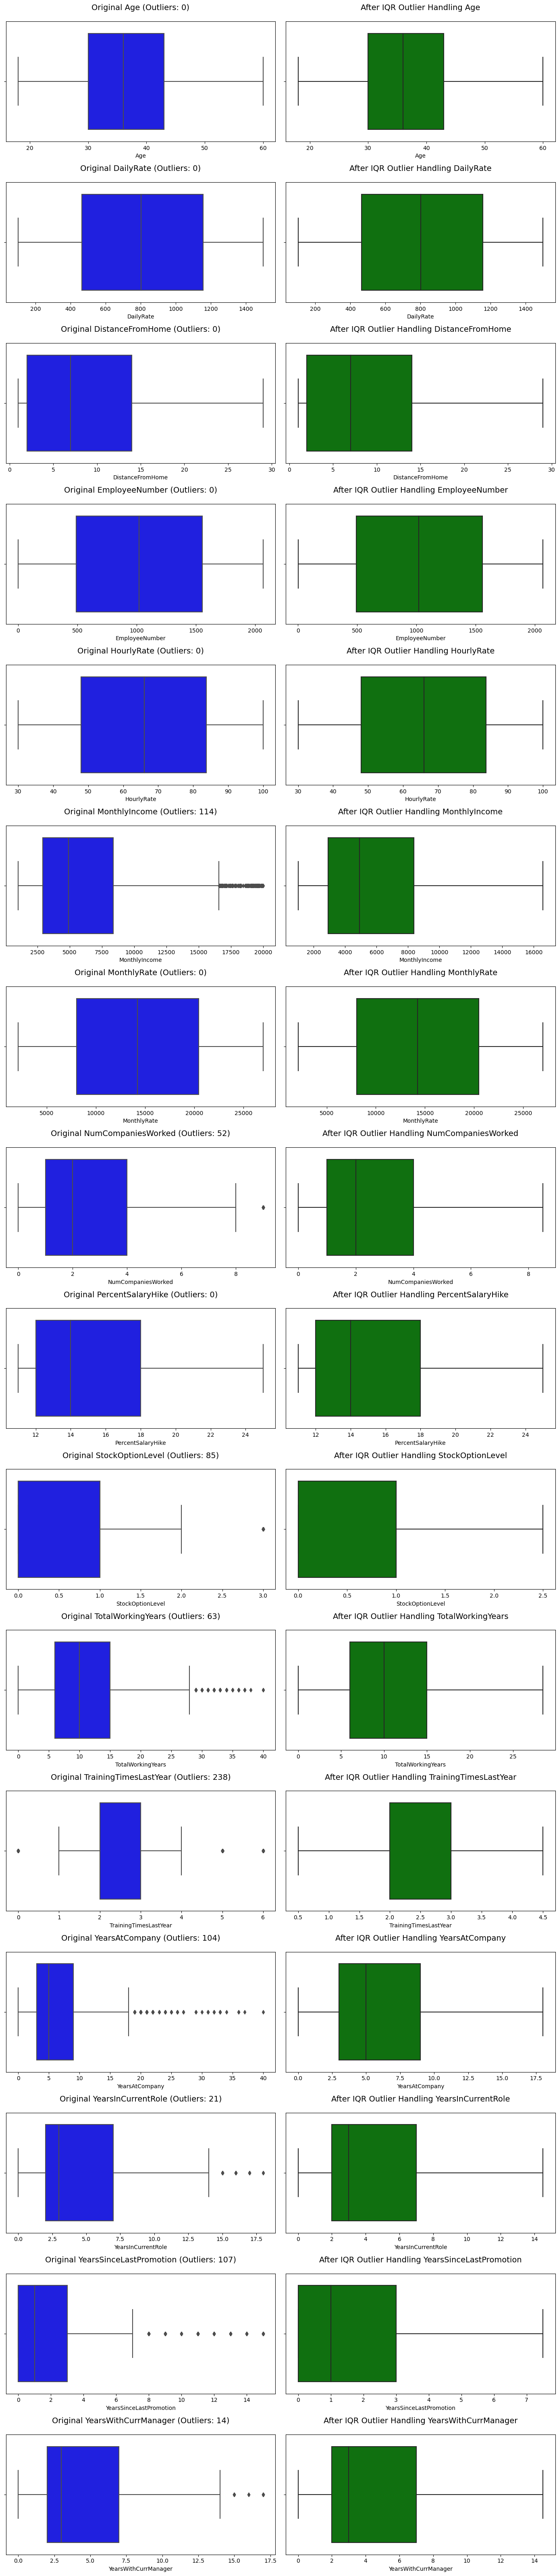

In [12]:
# iqr요 df 생성
df_iqr = df.copy()

# IQR 방식
def handle_outliers_iqr(col, dataframe):
    Q1 = dataframe[col].quantile(0.25)
    Q3 = dataframe[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = dataframe[(dataframe[col] < lower_bound) | (dataframe[col] > upper_bound)]
    outlier_count = outliers.shape[0]

    # Replace outliers with the lower and upper bounds
    dataframe.loc[(dataframe[col] < lower_bound), col] = lower_bound
    dataframe.loc[(dataframe[col] > upper_bound), col] = upper_bound

    return outlier_count

# 시각화
fig, axes = plt.subplots(len(variable_numeric_cols), 2, figsize=(14, len(variable_numeric_cols)*4))

for idx, col in enumerate(variable_numeric_cols):
    # 본 데이터
    sns.boxplot(x=df[col], ax=axes[idx, 0], color='blue')
    axes[idx, 0].set_title(f"Original {col} (Outliers: {handle_outliers_iqr(col, df_iqr)})", 
                            fontsize=14, pad=20)

    # 이상치 처리 후 데이터
    sns.boxplot(x=df_iqr[col], ax=axes[idx, 1], color='green')
    axes[idx, 1].set_title(f"After IQR Outlier Handling {col}", 
                            fontsize=14, pad=20)

plt.tight_layout()
plt.show()

In [13]:
# IQR 데이터 DF화
for col in variable_numeric_cols:
    handle_outliers_iqr(col, df_iqr)

outlier_indices = df_iqr[df_iqr.isnull().any(axis=1)].index

# 종속 변수가'Yes'인 경우
attrition_yes_outliers = df.loc[outlier_indices, 'Attrition'] == 'Yes'
attrition_yes_outliers_proportion = attrition_yes_outliers.mean()

attrition_yes_outliers_proportion

nan

- 종속 변수가'Yes'인 경우가 없어, IQR 방식으로 추출된 이상치를 제거해도 괜찮을 것 같다<br>하지만 추가적으로 다른 방법도 탐색

##### 1-2-2.  표준점수로 변환 후 -3이하 및 +3 제거

- Z-점수 표준화란?

    - Z-점수는 데이터 포인트가 평균으로부터 표준편차의 몇 배만큼 떨어져 있는지를 나타내는 표준화 방법입니다. Z-점수는 다음과 같은 수식으로 계산됩니다:

$$Z = \frac{(X - μ)}{σ}$$
<br><br>

<div style="text-align: center;">
    <img src="../img/z_score.png" width="500"/><br>
    (이미지 출처: <a href="https://vitalflux.com/z-score-z-statistics-concepts-formula-examples/">https://vitalflux.com/z-score-z-statistics-concepts-formula-examples/</a>)
</div>

여기서:
- X는 각 데이터 포인트를 나타냅니다.
- μ는 데이터의 평균을 나타냅니다.
- σ는 데이터의 표준편차를 나타냅니다.

Z-점수는 데이터를 표준화하여 각 데이터 포인트가 원래 분포의 평균으로부터 얼마나 떨어져 있는지를 측정합니다. 

데이터 포인트의 Z-점수가 3 또는 -3을 초과하는 경우, 이 데이터 포인트는 이상치로 간주됩니다. 이 값은 일반적으로 사용되는 임계값이지만, 필요에 따라 다른 값으로 설정할 수 있습니다.

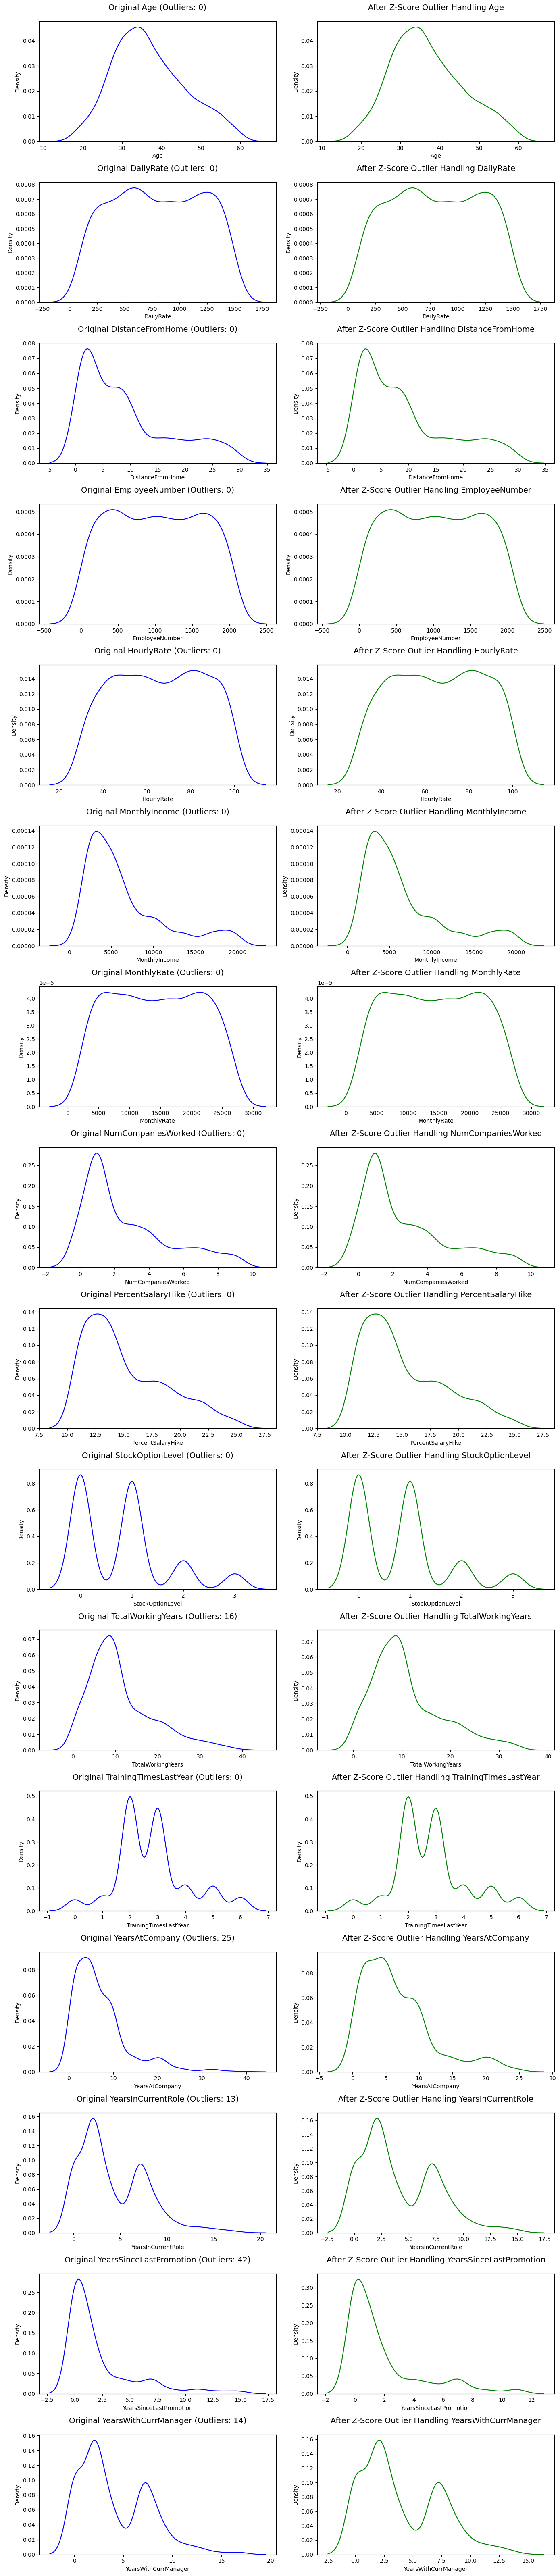

In [14]:
# Create a copy of the dataframe to apply outlier removal
df_zscore = df.copy()

# z-score +3, -3 함수
def handle_outliers_zscore(col, dataframe):
    z_scores = zscore(dataframe[col])
    abs_z_scores = np.abs(z_scores)

    outliers = dataframe[abs_z_scores > 3]
    outlier_count = outliers.shape[0]

    # Replace outliers with NaN
    dataframe.loc[(abs_z_scores > 3), col] = np.nan

    return outlier_count

# 시각화
fig, axes = plt.subplots(len(variable_numeric_cols), 2, figsize=(14, len(variable_numeric_cols)*4))

for idx, col in enumerate(variable_numeric_cols):
    # 본 데이터
    sns.distplot(df[col], ax=axes[idx, 0], color='blue', hist=False, kde=True)
    axes[idx, 0].set_title(f"Original {col} (Outliers: {handle_outliers_zscore(col, df_zscore)})", 
                            fontsize=14, pad=20)

    # 이상치 처리 후 데이터
    sns.distplot(df_zscore[col], ax=axes[idx, 1], color='green', hist=False, kde=True)
    axes[idx, 1].set_title(f"After Z-Score Outlier Handling {col}", 
                            fontsize=14, pad=20)

plt.tight_layout()
plt.show()

- 유의미한 변화가 보이지 않아, 다른 방식으로 추가 진행

##### 1-2-3.  표준화 후 PCA와 DBSCAN 알고리즘으로 제거
- 컨퍼런스에서 사용하셨던 DBSCAN 알고리즘이 떠올라, 이상치 제거에 적용해보았습니다.

In [15]:
# 수치형 컬럼만 선택
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# 표준화
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric_columns)

# 수치형 컬럼만 데이터 프레임화
numeric_scaled = pd.DataFrame(numeric_scaled, columns=numeric_columns.columns)

numeric_scaled.head()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.742527,-1.010909,0.0,-1.701283,1.383138,-0.108350,0.726020,2.125136,-1.150554,0.0,-0.932014,-0.421642,-2.171982,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-1.297775,-0.147150,0.0,-1.699621,-0.240677,-0.291719,1.488876,-0.678049,2.129306,0.0,0.241988,-0.164511,0.155707,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1.414363,-0.887515,0.0,-1.696298,1.284725,-0.937654,-1.674841,1.324226,-0.057267,0.0,-0.932014,-0.550208,0.155707,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,1.461466,-0.764121,0.0,-1.694636,-0.486709,-0.763634,1.243211,-0.678049,-1.150554,0.0,-0.932014,-0.421642,0.155707,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,-0.524295,-0.887515,0.0,-1.691313,-1.274014,-0.644858,0.325900,2.525591,-0.877232,0.0,0.241988,-0.678774,0.155707,-0.817734,-0.615492,-0.058285,-0.595227


- DBSCAN이란?
    - 데이터의 밀도에 기반한 클러스터링 알고리즘입니다.<br>데이터 포인트의 밀도를 계산하여,<br>데이터 포인트의 밀도가 일정 수준 이상이면 그 데이터 포인트를 클러스터의 일부로 간주합니다.

- DBSCAN은 다음과 같은 주요 특징

    - 클러스터의 수를 미리 정의할 필요가 없습니다: DBSCAN은 데이터의 분포에 따라 클러스터의 수를 자동으로 결정합니다.
    - 임의의 형태의 클러스터를 찾을 수 있습니다: DBSCAN은 k-means와 같은 알고리즘과 달리 원형의 클러스터만 찾지 않고, 임의의 형태의 클러스터를 찾을 수 있습니다.
    - 이상치를 처리할 수 있습니다: DBSCAN은 밀도가 낮은 영역의 데이터 포인트를 이상치로 간주하여, 이상치 탐지에도 사용할 수 있습니다.

- DBSCAN은 다음과 같은 두 개의 주요 매개변수

    - `eps`: 이 매개변수는 클러스터의 최대 반경을 정의합니다. `eps` 거리 내에 있는 데이터 포인트의 수가 `min_samples` 이상이면, 그 데이터 포인트를 클러스터의 일부로 간주합니다.
    - `min_samples`: 클러스터를 형성하는 데 필요한 최소 데이터 포인트의 수를 정의합니다.

이러한 특징 때문에 DBSCAN은 공간적 클러스터링과 이상치 탐지에 효과적인 알고리즘이라고 할 수 있습니다.<br><br>

<div style="text-align: center;">
    <img src="../img/dbscan.png" width="500"/><br>
    (이미지 출처: <a href="https://yganalyst.github.io/ml/ML_clustering/">https://yganalyst.github.io/ml/ML_clustering/</a>)
</div>

In [16]:
# DBSCAN
dbscan = DBSCAN(eps=3.0, min_samples=5)
clusters = dbscan.fit_predict(numeric_scaled)

# 이상치 수
outliers = (clusters == -1).sum() # (clusters == -1) -1일 경우, 클러스터에 속하지 않음

outliers

201

- PCA (Principal Component Analysis)란?
    - 즉 주성분 분석은 고차원 데이터를 저차원 데이터로 변환하는 데 사용되는 통계적 방법입니다.<br>PCA는 데이터의 분산이 최대가 되는 방향으로 축을 회전시키며, 이렇게 생성된 새로운 축을 주성분이라고 합니다.<br>이 주성분들은 원래의 특성들의 선형 조합으로 이루어져 있습니다.

- PCA 주요 특징

    - 데이터의 차원 축소: PCA는 고차원의 데이터를 저차원의 데이터로 축소시키는 데 주로 사용됩니다. 이는 데이터를 시각화하거나, 머신러닝 모델의 성능을 향상시키는 데 도움이 될 수 있습니다.
    - 정보 손실 최소화: PCA는 원본 데이터의 분산을 최대한 보존하려고 합니다. 이는 원본 데이터의 정보를 최대한 보존하면서 차원을 축소하는 데 도움이 됩니다.
    - 상관관계 감소: PCA는 변환된 데이터의 특성들이 서로 직교하도록 만듭니다. 이는 변환된 특성들 사이의 상관관계를 제거합니다.

PCA는 이러한 특징 때문에 데이터 전처리, 시각화, 특성 추출 등 다양한 분야에서 널리 사용됩니다.

- PCA의 축(차원)
    - 원본 데이터의 분산이 가장 큰 방향을 나타내는 벡터입니다.<br>첫 번째 주성분은 데이터의 분산이 가장 큰 방향을 찾아내고, 두 번째 주성분은 그 다음으로 분산이 큰 방향을 찾아냅니다.<br>이 과정은 원하는 차원의 수만큼 계속되며, 각 주성분은 이전의 주성분들과 직교(orthogonal)하게 설정됩니다.<br><br>

<div style="text-align: center;">
    <img src="../img/pca.png" width="500"/><br>
    (이미지 출처: <a href="https://m.blog.naver.com/sanghan1990/221156213790">https://m.blog.naver.com/sanghan1990/221156213790</a>)
</div>

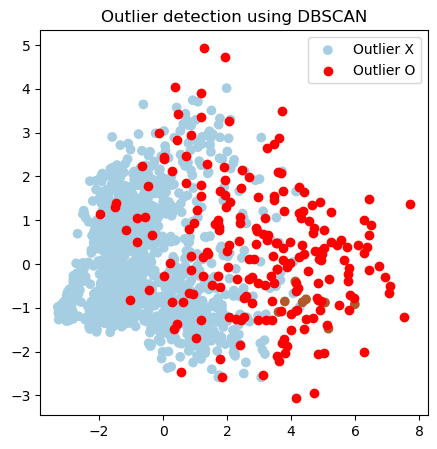

In [17]:
# 2차원으로 데이터 축소
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(numeric_scaled)

# Plot the reduced data and highlight the outliers
plt.figure(figsize=(5, 5))

# 이상치인 경우
plt.scatter(reduced_data[clusters != -1, 0], reduced_data[clusters != -1, 1], 
            c=clusters[clusters != -1], cmap='Paired', label='Outlier X')

# 이상치 아닌 경우
plt.scatter(reduced_data[clusters == -1, 0], reduced_data[clusters == -1, 1], 
            color='red', label='Outlier O')

plt.legend()
plt.title('Outlier detection using DBSCAN')
plt.show()

- 시각화된 결과물을 봤을 때<br>대체로 좌하단 방향으로 몰려있으며, 우상단에 가까운 데이터는 이상치로 파악됨을 알 수 있음

<div style="text-align: center;">
    <img src="../img/outlier_detection_dbscan.png" width="400"/>
</div>

In [18]:
# DBSCAN 알고리즘을 이용하여 파악된 이상치 제거하기

# 이상치에 대한 boolean mask 생성
outlier_mask = (clusters == -1)

# 이상치 데이터 추출
data_without_outliers = numeric_scaled[~outlier_mask]

data_without_outliers.head()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.742527,-1.010909,0.0,-1.701283,1.383138,-0.108350,0.726020,2.125136,-1.150554,0.0,-0.932014,-0.421642,-2.171982,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-1.297775,-0.147150,0.0,-1.699621,-0.240677,-0.291719,1.488876,-0.678049,2.129306,0.0,0.241988,-0.164511,0.155707,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1.414363,-0.887515,0.0,-1.696298,1.284725,-0.937654,-1.674841,1.324226,-0.057267,0.0,-0.932014,-0.550208,0.155707,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,1.461466,-0.764121,0.0,-1.694636,-0.486709,-0.763634,1.243211,-0.678049,-1.150554,0.0,-0.932014,-0.421642,0.155707,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,-0.524295,-0.887515,0.0,-1.691313,-1.274014,-0.644858,0.325900,2.525591,-0.877232,0.0,0.241988,-0.678774,0.155707,-0.817734,-0.615492,-0.058285,-0.595227


In [19]:
print('제거된 데이터수: ',len(df)-len(data_without_outliers))

제거된 데이터수:  201


##### 1-2-4.  KMeans 클러스터링 알고리즘으로 제거

In [20]:
# KMeans 모델 학습
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(numeric_scaled)

# 각 데이터 포인트에 대해 가장 가까운 클러스터의 중심점까지의 거리를 계산
distances = kmeans.transform(numeric_scaled)
min_distances = distances.min(axis=1)

# 이상치 임계값 설정 (3rd quartile + 1.5 * IQR)
Q1 = np.percentile(min_distances, 25)
Q3 = np.percentile(min_distances, 75)
IQR = Q3 - Q1
outlier_threshold = Q3 + 1.5 * IQR

# 이상치 탐지
outliers = min_distances > outlier_threshold
outlier_indices = np.where(outliers)[0]

# 이상치 개수 확인
len(outlier_indices)

20

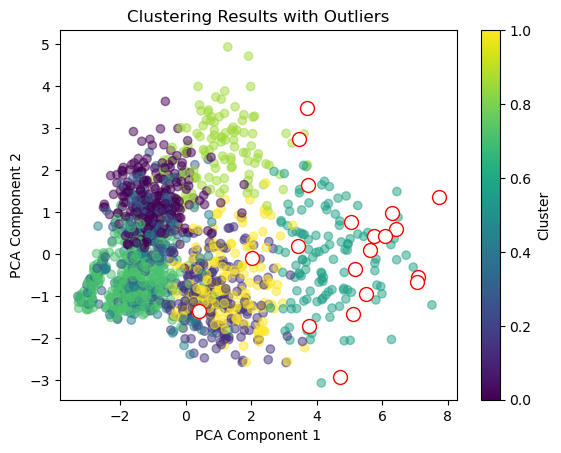

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA를 사용하여 데이터를 2차원으로 변환
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numeric_scaled)

# 클러스터 할당 결과
clusters = kmeans.predict(numeric_scaled)

# 이상치가 아닌 데이터와 이상치를 구분하기 위한 불리언 배열
not_outliers = np.logical_not(outliers)

# 이상치가 아닌 데이터를 그립니다.
plt.scatter(pca_result[not_outliers, 0], pca_result[not_outliers, 1], c=clusters[not_outliers], cmap='viridis', alpha=0.5)

# 이상치를 빨간색으로 그립니다.
plt.scatter(pca_result[outliers, 0], pca_result[outliers, 1], c='white', s=100, edgecolor='red')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering Results with Outliers')
plt.colorbar(label='Cluster')
plt.show()

---

### 2. 유의미한 시각화 5개 이상

1. 퇴사 여부에 따른 직무 만족도 비교
2. 퇴사 여부에 따른 급여 분포 비교
3. 직급에 따른 퇴사 비율
4. 초과근무에 따른 퇴사 비율
5. 직무 스트레스 수준과 퇴사 간의 비율

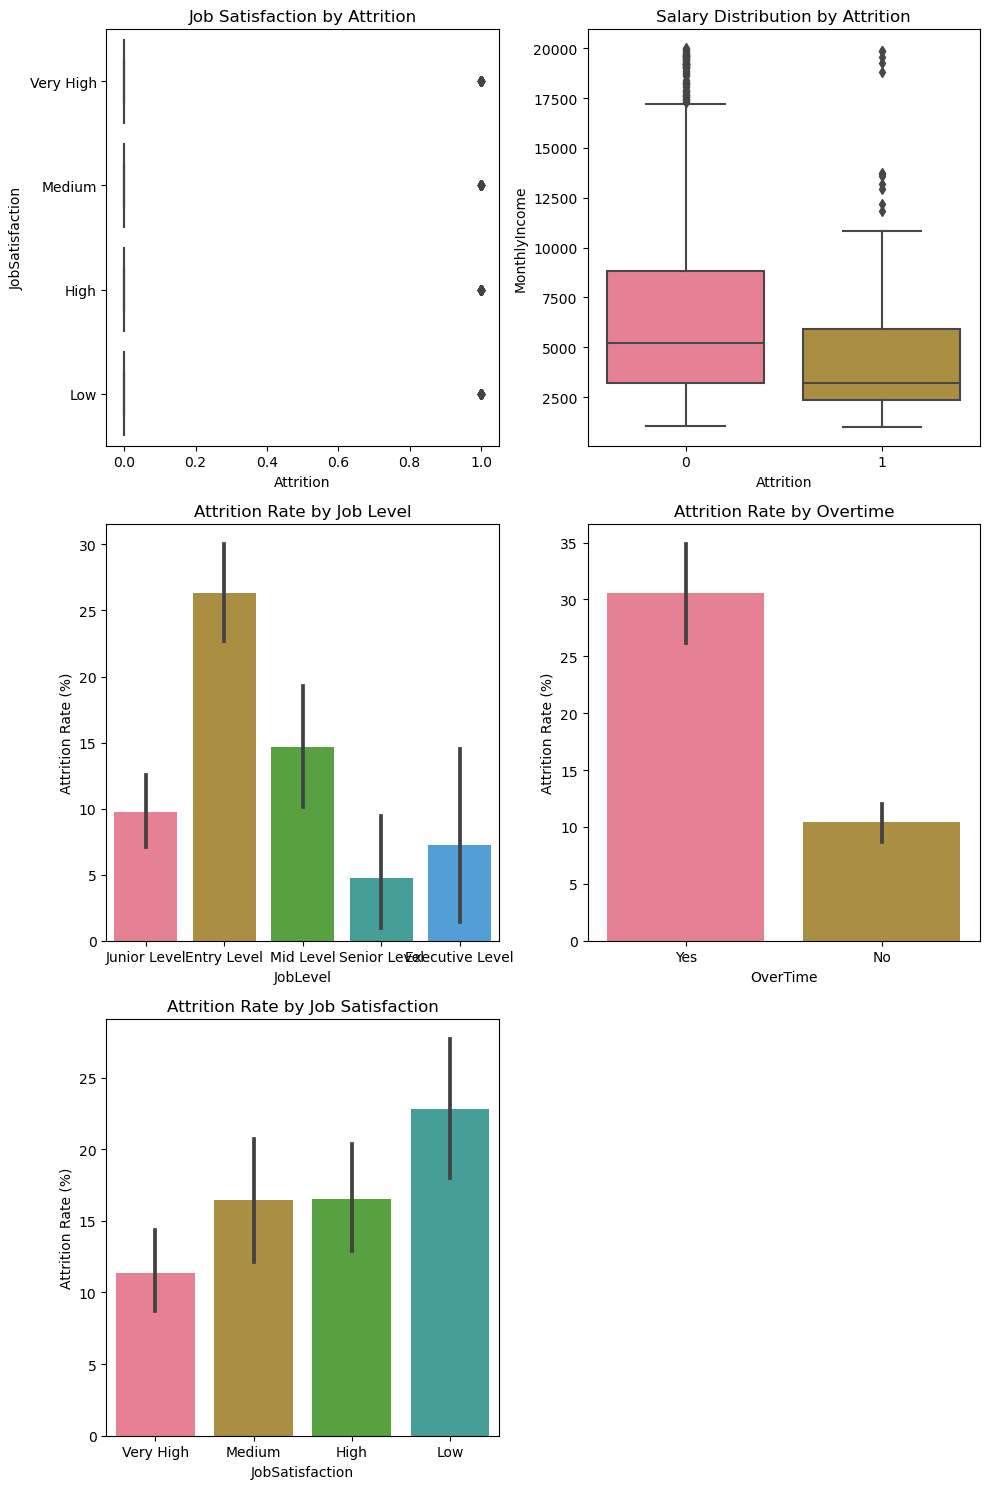

In [22]:
sns.set_palette("husl")

df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

fig, ax = plt.subplots(3, 2, figsize=(10, 15))

# 퇴사 여부에 따른 직무 만족도 비교
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df, ax=ax[0, 0])
ax[0, 0].set_title('Job Satisfaction by Attrition')

# 퇴사 여부에 따른 급여 분포 비교
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Salary Distribution by Attrition')

# 직급에 따른 퇴사 비율
sns.barplot(x='JobLevel', y='Attrition', data=df, estimator=lambda x: sum(x!=0)*100.0/len(x), ax=ax[1, 0])
ax[1, 0].set_title('Attrition Rate by Job Level')
ax[1, 0].set_ylabel('Attrition Rate (%)')

# 초과근무에 따른 퇴사 비율
sns.barplot(x='OverTime', y='Attrition', data=df, estimator=lambda x: sum(x!=0)*100.0/len(x), ax=ax[1, 1])
ax[1, 1].set_title('Attrition Rate by Overtime')
ax[1, 1].set_ylabel('Attrition Rate (%)')

# 사용하지 않는 plot 제거
fig.delaxes(ax[2, 1])

# 직무 스트레스 수준과 퇴사 간의 비율
sns.barplot(x='JobSatisfaction', y='Attrition', data=df, estimator=lambda x: sum(x!=0)*100.0/len(x), ax=ax[2, 0])
ax[2, 0].set_title('Attrition Rate by Job Satisfaction')
ax[2, 0].set_ylabel('Attrition Rate (%)')

plt.tight_layout()
plt.show()

| 시각화 | 해석 |
|:-------:|:-----|
| 퇴사 여부에 따른 직무 만족도 | 이직한 직원들의 직무 만족도 점수가 이직하지 않은 직원들보다 약간 낮습니다. 이는 직무 만족도가 직원 이직에 영향을 미칠 수 있음을 시사합니다. |
| 퇴사 여부에 따른 급여 분포 비교 | 회사에 남아 있는 직원들의 중간 월급이 이직한 직원들보다 높습니다. 또한, 회사에 남아 있는 직원들의 월급의 사분위 범위(IQR)가 훨씬 넓어서 월급 범위가 다양함을 보여줍니다. 이는 높은 월급이 직원을 유지하는 요인이 될 수 있음을 시사합니다. |
| 직급에 따른 퇴사 비율 | 초급 및 중급 직급의 직원들의 이직률이 중급, 고급, 그리고 경영진 직급에 비해 높게 나타납니다. 이는 초급 및 중급 직원들이 회사에 대한 애착이 적거나 더 좋은 기회를 찾을 수 있기 때문일 수 있습니다. |
| 초과근무에 따른 퇴사 비율 | 초과근무를 하는 직원들의 이직률이 그렇지 않은 직원들에 비해 훨씬 높습니다. 이는 과중한 업무량이나 긴 근무시간이 직원 이직에 영향을 미칠 수 있음을 시사합니다. |
| 직무 스트레스 수준과 퇴사 간의 비율 | 직무 만족도가 낮은 직원들(낮음, 보통)의 이직률이 높은 직원들(높음, 매우 높음)에 비해 높습니다. 이는 첫 번째 플롯에서 직무 만족도가 직원 유지에 중요한 요소라는 사실을 재확인합니다. |

---

### 3. 수치형 변수 간 상관관계 파악

In [23]:
# correlation matrix
df_corr = df.drop(columns=['EmployeeCount','StandardHours'])
corr_matrix = df_corr.corr()
corr_matrix

,Age,Attrition,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,-0.010145,0.024287,0.497855,0.028051,0.299635,0.003634,0.037510,0.680381,-0.019621,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.010577,-0.006846,-0.159840,0.015170,0.043494,-0.013478,-0.137145,-0.171063,-0.059478,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.050990,0.023381,0.007707,-0.032182,0.038153,0.022704,0.042143,0.014515,0.002453,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.032916,0.031131,-0.017014,0.027473,-0.029251,0.040235,0.044872,0.004628,-0.036942,0.009508,0.018845,0.010029,0.014406
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,1.000000,0.035179,-0.014829,0.012648,-0.001251,-0.012944,0.062227,-0.014365,0.023603,-0.011240,-0.008416,-0.009019,-0.009197
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.035179,1.000000,-0.015794,-0.015297,0.022157,-0.009062,0.050263,-0.002334,-0.008548,-0.019582,-0.024106,-0.026716,-0.020123
MonthlyIncome,0.497855,-0.159840,0.007707,-0.017014,-0.014829,-0.015794,1.000000,0.034814,0.149515,-0.027269,0.005408,0.772893,-0.021736,0.514285,0.363818,0.344978,0.344079
MonthlyRate,0.028051,0.015170,-0.032182,0.027473,0.012648,-0.015297,0.034814,1.000000,0.017521,-0.006429,-0.034323,0.026442,0.001467,-0.023655,-0.012815,0.001567,-0.036746
NumCompaniesWorked,0.299635,0.043494,0.038153,-0.029251,-0.001251,0.022157,0.149515,0.017521,1.000000,-0.010238,0.030075,0.237639,-0.066054,-0.118421,-0.090754,-0.036814,-0.110319
PercentSalaryHike,0.003634,-0.013478,0.022704,0.040235,-0.012944,-0.009062,-0.027269,-0.006429,-0.010238,1.000000,0.007528,-0.020608,-0.005221,-0.035991,-0.001520,-0.022154,-0.011985


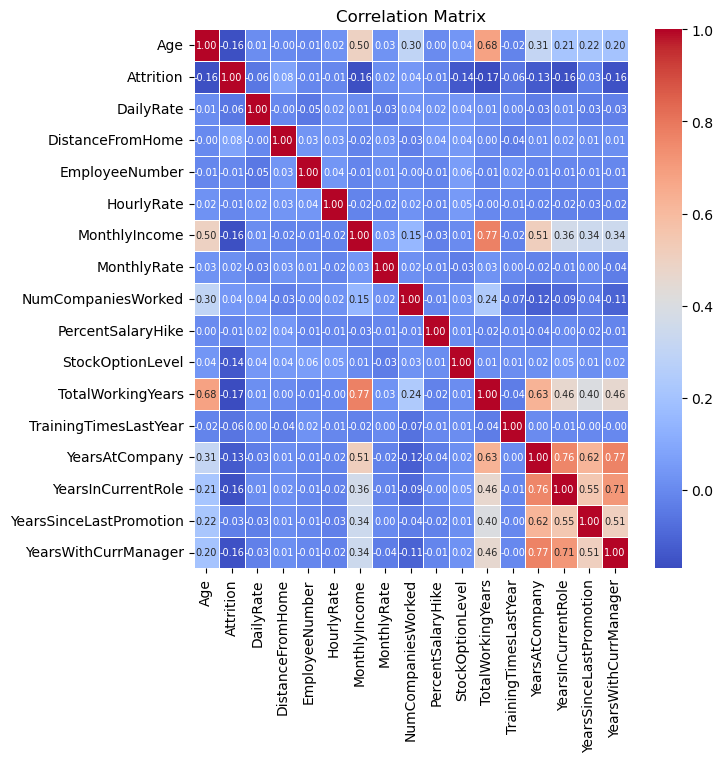

In [24]:
# 히트맵 그리기
plt.figure(figsize=(7,7))
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 7}, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

- 상관계수 중 눈에 띄는 부분만 정리
| 특징 1 | 특징 2 | 상관 관계 값 | 해석 |
| :- | :- | :-: | :- |
| 나이 | 총 근무 년수 | 0.68 | 강한 양의 상관 관계. 나이가 많을수록 총 근무 년수가 많다. |
| 월급 | 총 근무 년수 | 0.77 | 강한 양의 상관 관계. 총 근무 년수가 많을수록 월급이 높다. |
| 월급 | 회사 근속 년수 | 0.51 | 중간 정도의 양의 상관 관계. 회사 근속 년수가 많을수록 월급이 높다. |
| 총 근무 년수 | 회사 근속 년수 | 0.63 | 강한 양의 상관 관계. 총 근무 년수가 많을수록 회사 근속 년수가 많다. |
| 회사 근속 년수 | 현재 역할에서의 근속 년수 | 0.76 | 강한 양의 상관 관계. 회사 근속 년수가 많을수록 현재 역할에서의 근속 년수가 많다. |
| 현재 역할에서의 근속 년수 | 마지막 승진 이후 년수 | 0.55 | 중간 정도의 양의 상관 관계. 현재 역할에서의 근속 년수가 많을수록 마지막 승진 이후 년수가 많다. |

---

### 4. 파생변수 생성

| 파생 변수 | 설명 | 생성 방법 |
| --- | --- | --- |
| SatisfactionLevel | 직원의 전반적인 만족도를 나타냅니다. 만약 직원이 작업, 환경, 그리고 관계에 대해 만족하고 있다면, 그들이 회사를 떠날 가능성은 상대적으로 낮을 것입니다. | 'JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction'의 평균값으로 계산하였습니다. |
| Stagnation | 직원이 현재의 역할에 얼마나 오래 머물렀는지를 나타냅니다. 만약 직원이 현재의 역할에 오랫동안 머물렀다면, 그들이 새로운 도전을 찾기 위해 회사를 떠날 가능성이 높을 수 있습니다. | 'YearsInCurrentRole'을 'YearsAtCompany'로 나눈 값으로 계산하였습니다. |

In [25]:
# 새로운 특성 'SatisfactionLevel' 생성
# 'JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction'의 평균값
# 우선 변수를 숫자로 변환

satisfaction_mapping = {
    'Low': 1,
    'Medium': 2,
    'High': 3,
    'Very High': 4
}

df['JobSatisfaction'] = df['JobSatisfaction'].map(satisfaction_mapping)
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].map(satisfaction_mapping)
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].map(satisfaction_mapping)

# 평균 만족도 계산
df['SatisfactionLevel'] = df[['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction']].mean(axis=1)

# 새로운 특성 'WorkLifeBalance'
# 변수를 숫자로 변환
balance_mapping = {
    'Bad': 1,
    'Good': 2,
    'Better': 3,
    'Best': 4
}

df['WorkLifeBalance'] = df['WorkLifeBalance'].map(balance_mapping)

# 새로운 특성 'Stagnation' 생성
# 'YearsInCurrentRole'을 'YearsAtCompany'로 나눈 값
# 만약 'YearsAtCompany'가 0이라면, 'Stagnation'은 0
df['Stagnation'] = df['YearsInCurrentRole'] / df['YearsAtCompany']
df['Stagnation'].fillna(0, inplace=True)

df[['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'SatisfactionLevel', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsAtCompany', 'Stagnation']].head()


,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,SatisfactionLevel,WorkLifeBalance,YearsInCurrentRole,YearsAtCompany,Stagnation
0,4,2,1,2.333333,1,4,6,0.666667
1,2,3,4,3.000000,3,7,10,0.700000
2,3,4,2,3.000000,3,0,0,0.000000
3,3,4,3,3.333333,3,7,8,0.875000
4,2,1,4,2.333333,3,2,2,1.000000


In [26]:
mean_values = df.groupby('Attrition')[['SatisfactionLevel', 'Stagnation']].mean()
mean_values

,SatisfactionLevel,Stagnation
Attrition,,
0,2.761287,0.597181
1,2.510549,0.479574


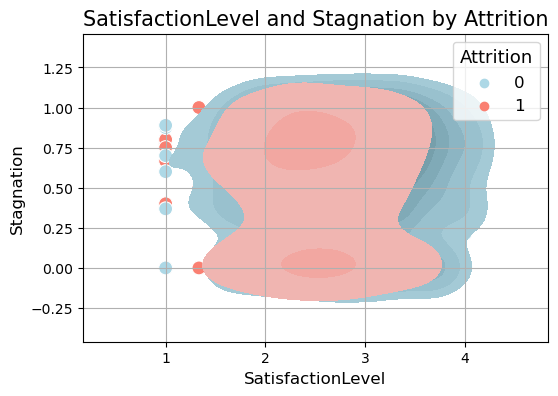

In [27]:
plt.figure(figsize=(6, 4))

palette = {0: 'lightblue', 1: 'salmon'}

sns.scatterplot(x='SatisfactionLevel', y='Stagnation', hue='Attrition', data=df, s=100, palette=palette)
sns.kdeplot(data=df, x="SatisfactionLevel", y="Stagnation", hue="Attrition", fill=True, palette=palette)

plt.xlabel('SatisfactionLevel', fontsize=12)
plt.ylabel('Stagnation', fontsize=12)
plt.title('SatisfactionLevel and Stagnation by Attrition', fontsize=15)
plt.legend(title='Attrition', title_fontsize='13', loc='upper right', fontsize='12')

plt.grid(True)
plt.show()

- 퇴직을 하지 않은 사람들이 전반적으로 직업 만족도가 아예 높거나, 낮은 분포를 보입니다

<div style="text-align: center;">
    <img src="../img/attrition_satisfaction.png" width="400"/>
</div>

---
### 참고
- 현재 데이터셋에서 활용하기 힘들지만,<br>경영학과에서 '조직관리'라는 수업을 들으며 읽었던 글 중 퇴사 관련하여<br>배경지식이 될만한 글들을 추려보았습니다.<br>
- 모델링까지 고려한다면, 어떠한 내용들이 있었는지 선행연구로 참고할만 한 것 같습니다.

1. 인성 데이터를 활용한 조기 퇴사자 예측(https://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE07321792)
2. HR 데이터 기반의 퇴사 예측 모델 개발(https://manuscriptlink-society-file.s3-ap-northeast-1.amazonaws.com/kips/conference/kips2021spring/presentation/KIPS_C2021A0054.pdf)
3. 기계 학습 방법을 이용한 직장 생활 프로파일 기반의 퇴직 예측 모델 개발(https://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE07480553&nodeId=NODE07480553&medaTypeCode=185005&language=ko_KR&hasTopBanner=true)